## Explore Zorro data

In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pickle

In [9]:
dataDir = '/global/cscratch1/sd/chebert/zorro/'

In [10]:
filenames = ! ls $dataDir
fileNames = list(set([f.split('.')[0].strip('S20')[:-1] for f in filenames]))

In [11]:
'190518Z0259' in fileNames

True

In [78]:
def readHeaders(headerDict, filenames):
    for fn in filenames:
        try:
            try:
                hdu = fits.open(dataDir + 'S20' + fn + 'b.fits.bz2')
                header = hdu[0].header
                hdu.close()
            except IOError:
                print(fn)
                continue
        except FileNotFoundError:
            try:
                hdu = fits.open(dataDir + 'S20' + fn + 'r.fits.bz2')
                header = hdu[0].header
                hdu.close()
            except IOError:
                print(fn)
                continue
                
        headerDict[fn] = {k: header[k] for k in ['TARGRA', 'TARGDEC', 
                                                 'AIRMASS', 'DATE-OBS', 
                                                 'OBSTIME', 'HUMIDITY']}
        try:
            headerDict[fn]['object'] = header['COMMENT'][2]
        except IndexError:
            headerDict[fn]['object'] = header['OBJECT']
    return headerDict

In [79]:
headerdict = {}
headerdict = readHeaders(headerdict, fileNames)

190521Z0616
190522Z0902
190522Z0896
190522Z0892
190521Z0620
190522Z0899
190522Z0904
190522Z0898
190521Z0623
190521Z0622
190522Z0894
190522Z0893
190521Z0618
190521Z0617
190522Z0900
190521Z0619
190521Z0615
190522Z1040
190522Z0895
190522Z0897
190522Z0903
190522Z0901
190521Z0621
190521Z0624


(array([10., 64.,  6.,  1.,  5.,  0.,  0.,  0.,  0.,  1.]),
 array([1.004 , 1.0491, 1.0942, 1.1393, 1.1844, 1.2295, 1.2746, 1.3197,
        1.3648, 1.4099, 1.455 ]),
 <a list of 10 Patch objects>)

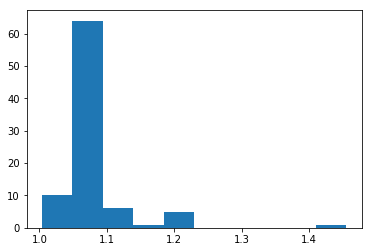

In [81]:
plt.hist([headerdict[k]['AIRMASS'] for k in headerdict.keys()])

In [ ]:
hdu = fits.open(dataDir+'S20190519Z0499b.fits.bz2')
dataB = hdu[0].data
headerB = hdu[0].header
hdu.close()

hdu = fits.open(dataDir+'S20190519Z0499r.fits.bz2')
dataR = hdu[0].data
headerR = hdu[0].header
hdu.close()

In [ ]:
headerB

In [ ]:
expTime=[0,1000]
plt.figure(figsize=(6,3))
ax=plt.subplot(121)
plt.imshow(dataB[expTime[0]:expTime[1]].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], [0, .7, 1.4, 2.1, 2.8])
plt.yticks([0, 64, 128, 192, 256], [0, .7, 1.4, 2.1, 2.8])
plt.ylabel('[arcsec]')
plt.xlabel('[arcsec]')
# ax.text(5, 235, '692nm', color='gold', fontsize=12)
ax=plt.subplot(122)
plt.imshow(dataR[expTime[0]:expTime[1]].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], [0, .7, 1.4, 2.1, 2.8])
plt.yticks([0, 64, 128, 192, 256], [])
# ax.text(5, 235, '880nm', color='gold', fontsize=12)
plt.xlabel('[arcsec]')

plt.tight_layout()

In [29]:
hdu = fits.open(dataDir+'../rawSpeckles/img_a_021.fits')
data = hdu[0].data
header = hdu[0].header
hdu.close()

In [30]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
NAXIS3  =                 1000 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HEAD    = 'DV887_BV'           / Head model                                     
ACQMODE = 'Kinetics'           / Acquisition mode                               
ACT     =              0.11522 / Integration cycle time                         
KCT     =              0.115

In [6]:
import imageHelper as helper

In [7]:
hsmOutB = helper.singleExposureHSM(img=dataB.mean(axis=0))
hsmOutR = helper.singleExposureHSM(img=dataR.mean(axis=0))

In [8]:
lB=562
lR=832

In [9]:
sB, sR = hsmOutB.moments_sigma, hsmOutR.moments_sigma

In [10]:
np.log(sB/sR)/np.log(lB/lR)

-0.3647713164031718

In [11]:
sB*.009

0.3502985572814941

In [12]:
hsmOutR.observed_shape.g1, hsmOutR.observed_shape.g2

(0.007439393541736416, 0.01565872653839197)